In [5]:
from copy import deepcopy
import yaml
from pathlib import Path
import torch
import shutil
import matplotlib.pyplot as plt
import h5py
from networks.losses import PhysicalLossV2

%reload_ext autoreload
%autoreload 2

# Plot examples

In [6]:
# dataset_name = "dataset_lukas_print_lots_of_timesteps_10dp_v4"
# points = range(10)
# points = [1,2,8,9]
# points = [2]
# dataset_name = "dataset_long_sim_100y"
# points = [0]
# dataset_name = "dataset_medium_k_3e-10_1000dp_high_perm"
# points = [3, 13, 14, 15, 20, 21, 22, 25, 29, 36, 38, 39]
# shape = (1280, 64)
# dataset_name = "dataset_lukas_200y"
# points = range(5)
# shape = (600, 20)
# dataset_name = "test"
# points = [1]
# shape = (4096, 64)
dataset_name = "plume_extension"
points = range(9)
shape = (6000, 128)
with open("paths.yaml", "r") as paths:
    paths = yaml.safe_load(paths)
    path = paths["default_raw_dir"] + "/" + dataset_name + "/"
loss = PhysicalLossV2("cpu")

Datapoint: 0


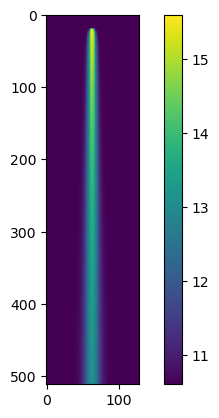

   Background velocity: tensor(0.0793) m/day
   Maximum    velocity: tensor(0.0882) m/day


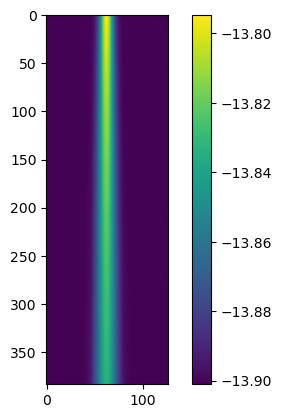

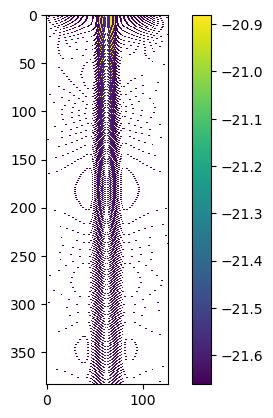

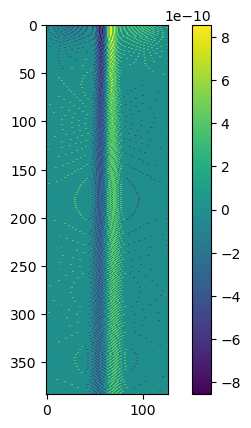

Datapoint: 1


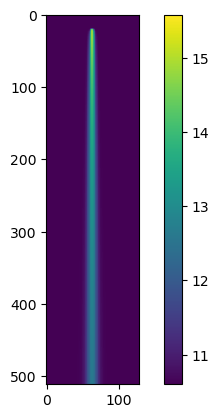

   Background velocity: tensor(0.1329) m/day
   Maximum    velocity: tensor(0.1454) m/day


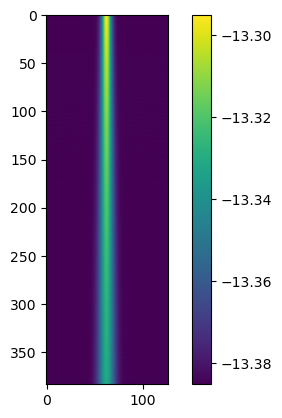

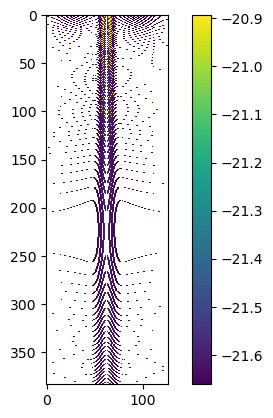

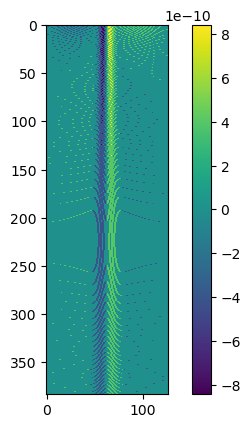

Datapoint: 2


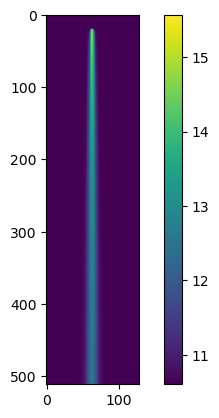

   Background velocity: tensor(0.1470) m/day
   Maximum    velocity: tensor(0.1605) m/day


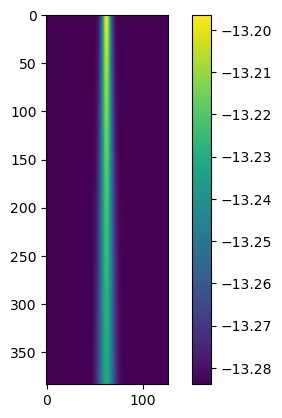

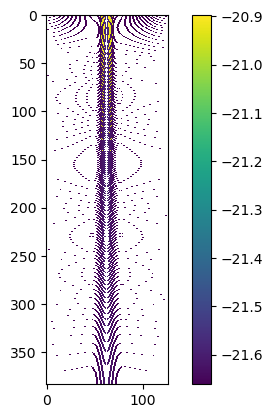

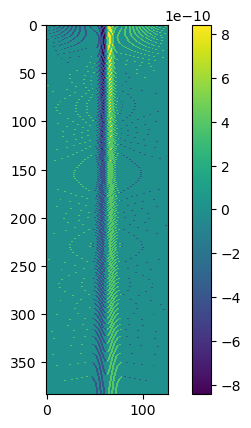

Datapoint: 3


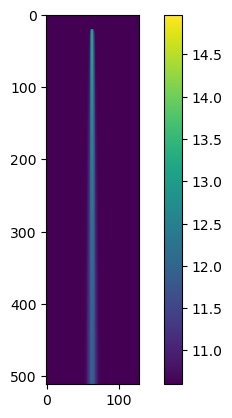

   Background velocity: tensor(0.2978) m/day
   Maximum    velocity: tensor(0.3185) m/day


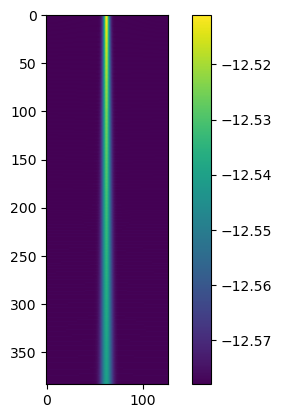

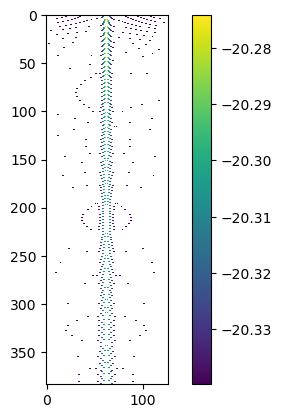

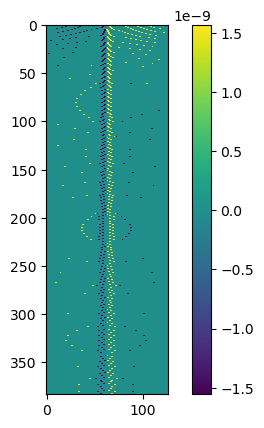

Datapoint: 4


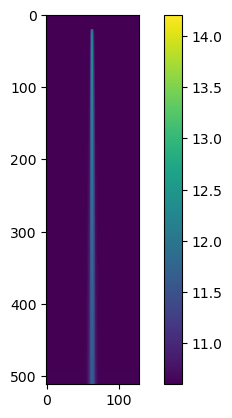

   Background velocity: tensor(0.4974) m/day
   Maximum    velocity: tensor(0.5254) m/day


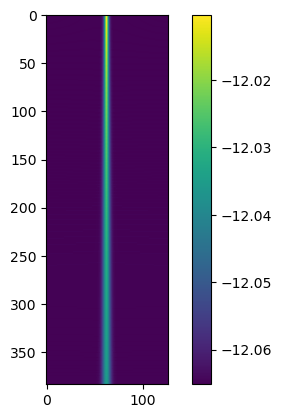

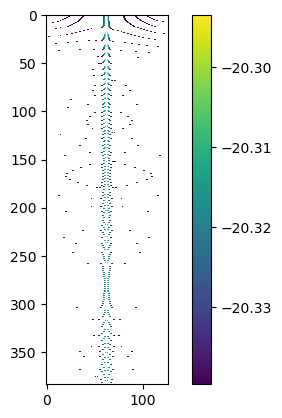

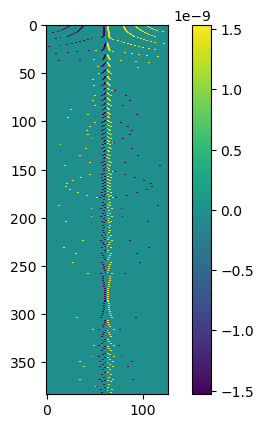

Datapoint: 5


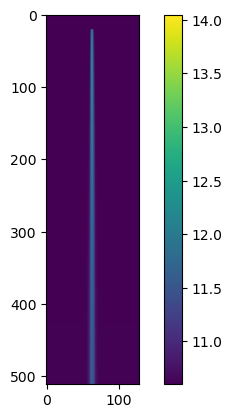

   Background velocity: tensor(0.5505) m/day
   Maximum    velocity: tensor(0.5803) m/day


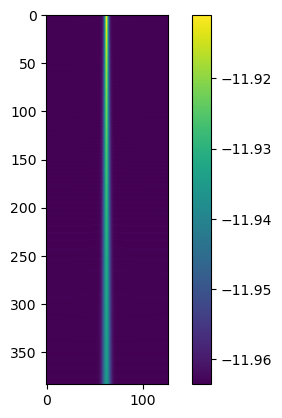

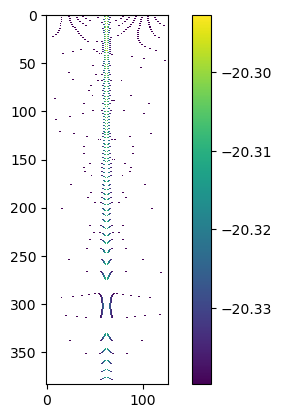

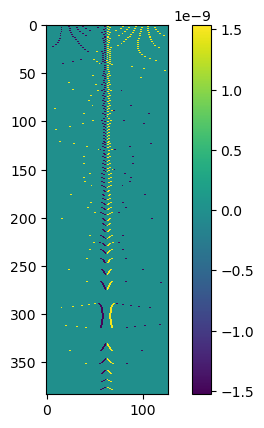

Datapoint: 6


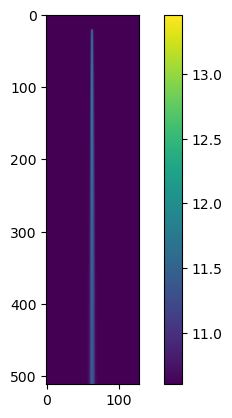

   Background velocity: tensor(0.7959) m/day
   Maximum    velocity: tensor(0.8337) m/day


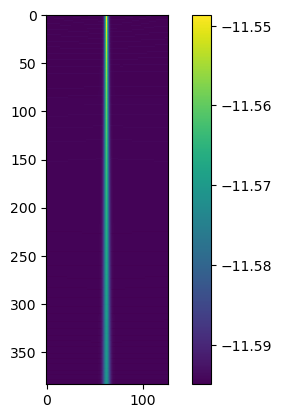

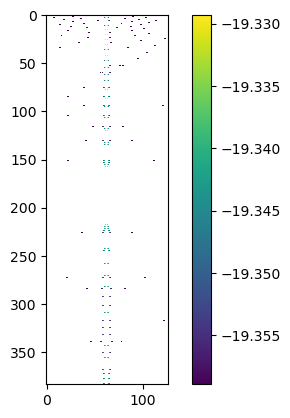

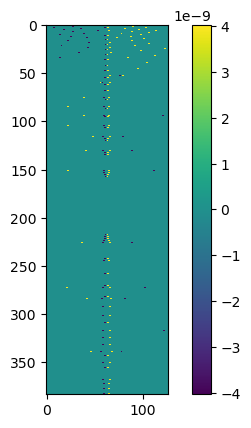

Datapoint: 7


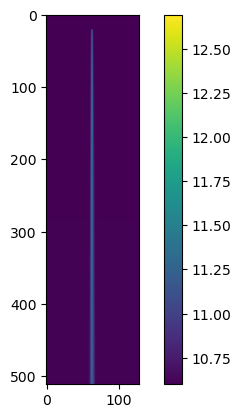

   Background velocity: tensor(1.3283) m/day
   Maximum    velocity: tensor(1.3793) m/day


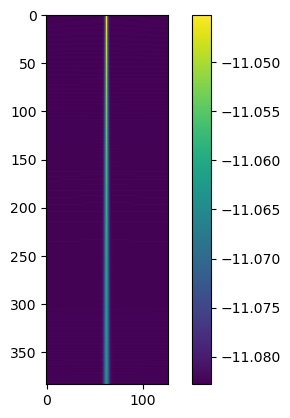

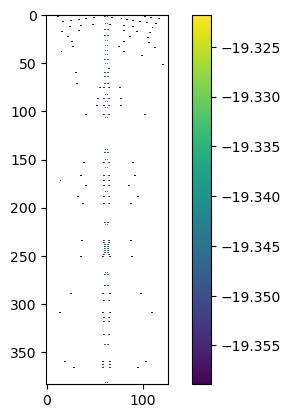

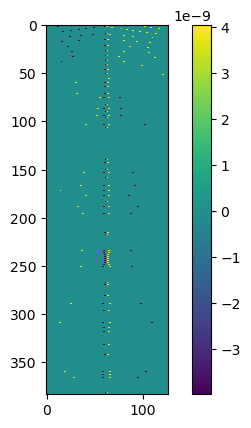

Datapoint: 8


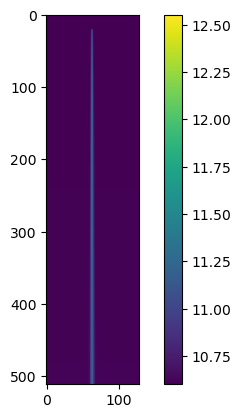

   Background velocity: tensor(1.4700) m/day
   Maximum    velocity: tensor(1.5236) m/day


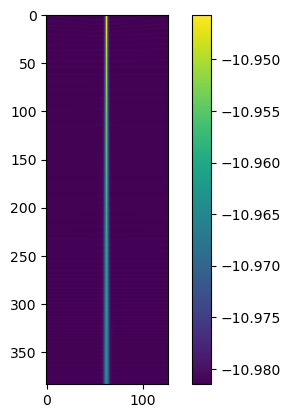

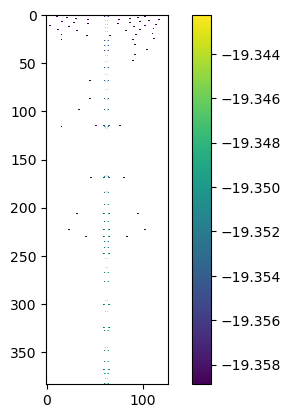

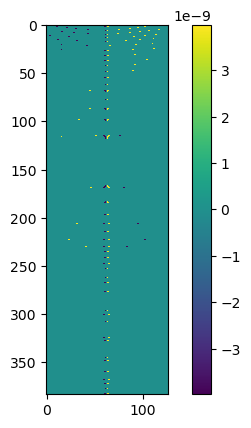

In [8]:
for i in points:
    print("Datapoint: " + str(i))
    file = h5py.File(path + "RUN_" + str(i) + "/pflotran.h5", 'r')
    dp = file[list(file.keys())[2]]
    temp = torch.tensor(dp['Temperature [C]']).float().reshape(shape).unsqueeze(0)
    press = torch.tensor(dp['Liquid Pressure [Pa]']).float().reshape(shape).unsqueeze(0)
    perm = torch.tensor(dp['Permeability X [m^2]']).float().reshape(shape).unsqueeze(0)
    darcy_x, darcy_y = loss.get_darcy(temp, press, perm, 5.0)
    plt.imshow(temp.squeeze()[0:512])
    plt.colorbar()
    plt.show()
    print("   Background velocity: " + str(torch.min(darcy_x.squeeze()[128:512]) * 60*60*24) + " m/day")
    print("   Maximum    velocity: " + str(torch.max(darcy_x.squeeze()[128:512]) * 60*60*24) + " m/day")
    plt.imshow(torch.log(torch.abs(darcy_x.squeeze()[128:512])))
    plt.colorbar()
    plt.show()
    plt.imshow(torch.log(torch.abs(darcy_y.squeeze()[128:512])))
    plt.colorbar()
    plt.show()
    plt.imshow(darcy_y.squeeze()[128:512])
    plt.colorbar()
    plt.show()
    # plt.imshow(darcy_y.squeeze()[:64])
    # plt.colorbar()
    # plt.show()

Datapoint: 0
   5 Time  2.00000E+03 y


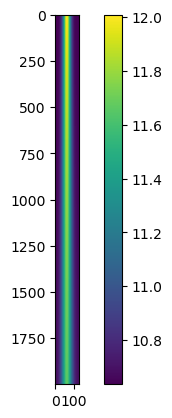

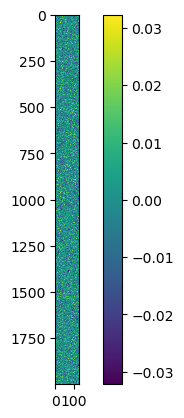

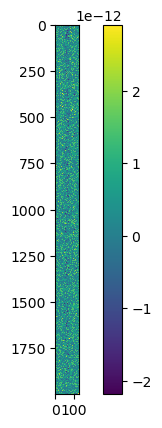

Datapoint: 1
   5 Time  2.00000E+03 y


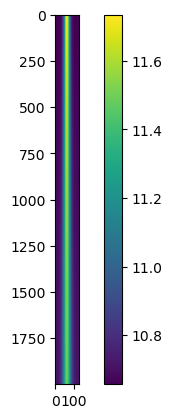

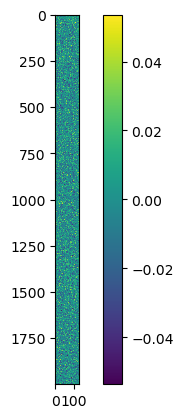

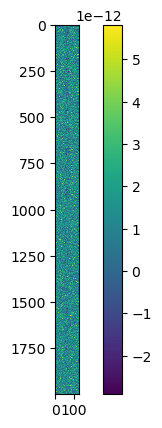

Datapoint: 2
   3 Time  1.00000E+03 y


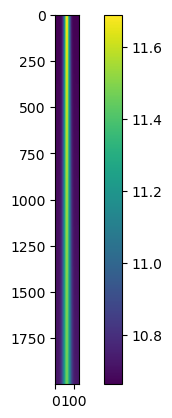

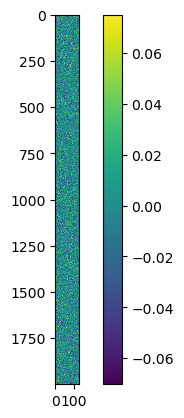

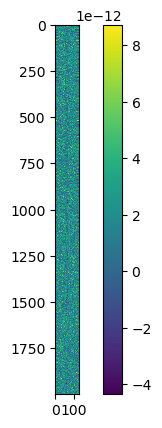

Datapoint: 3
   5 Time  4.00000E+02 y


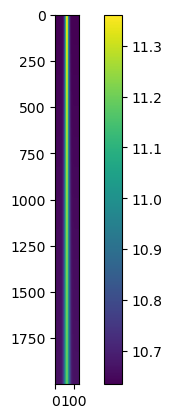

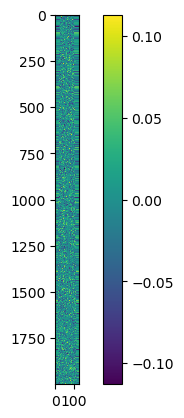

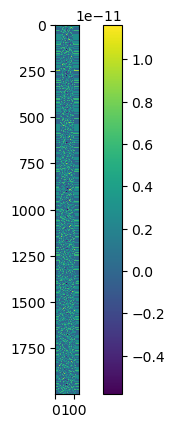

Datapoint: 4
   5 Time  4.00000E+02 y


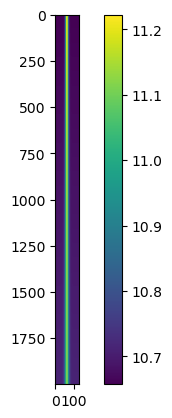

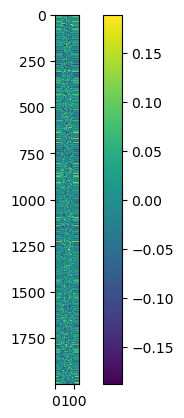

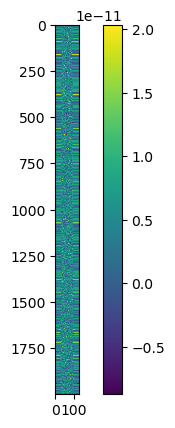

Datapoint: 5
   6 Time  6.00000E+02 y


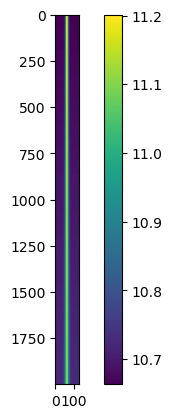

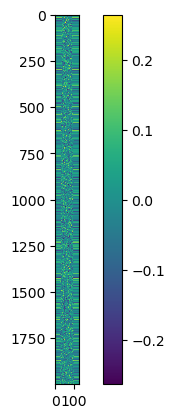

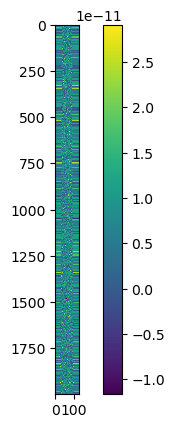

Datapoint: 6
   4 Time  2.00000E+02 y


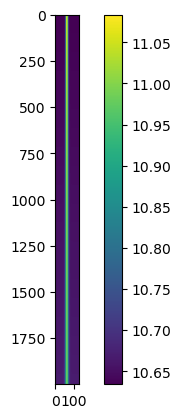

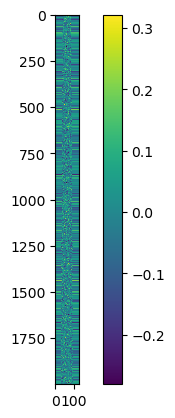

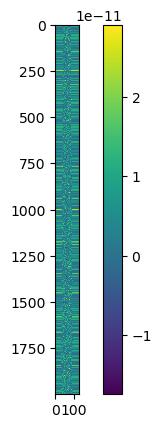

Datapoint: 7
   4 Time  2.00000E+02 y


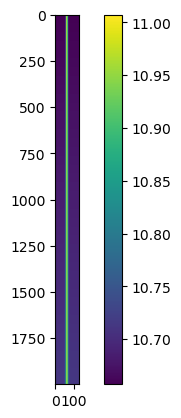

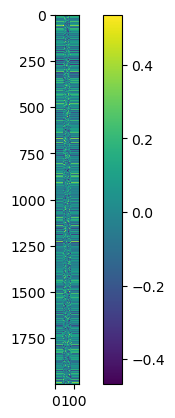

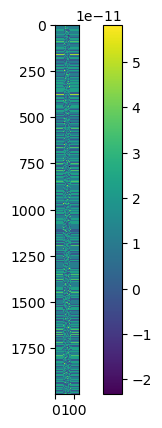

Datapoint: 8
   4 Time  2.00000E+02 y


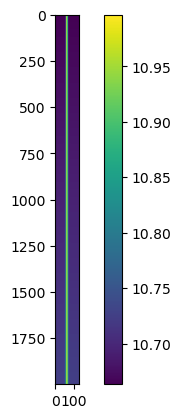

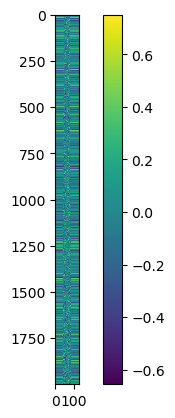

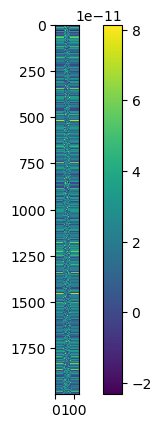

In [10]:

upper_end = 4000
lower_end = 2000
gradient = [0.0015, 0.0025, 0.0035]
for i in points:
    print("Datapoint: " + str(i))
    file = h5py.File(path + "RUN_" + str(i) + "/pflotran.h5", 'r')
    for time in list(file.keys())[-1:]:
        print(time)
        dp = file[time]
        temp = torch.tensor(dp['Temperature [C]']).float().reshape(shape).unsqueeze(0)
        press = torch.tensor(dp['Liquid Pressure [Pa]']).float().reshape(shape).unsqueeze(0)
        perm = torch.tensor(dp['Permeability X [m^2]']).float().reshape(shape).unsqueeze(0)
        plt.imshow(temp.squeeze()[lower_end:upper_end])
        plt.colorbar()
        plt.show()
        res_ener = loss.get_energy_error(temp, gradient[i%3], press, perm, 5.0)
        plt.imshow(res_ener.squeeze()[lower_end:upper_end])
        plt.colorbar()
        plt.show()
        res_cont = loss.get_continuity_error(temp, gradient[i%3], press, perm, 5.0)
        plt.imshow(res_cont.squeeze()[lower_end:upper_end])
        plt.colorbar()
        plt.show()

Datapoint: 0
   0 Time  0.00000E+00 y


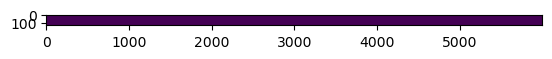

   Delta (abs) to:    1 Time  4.00000E+02 y


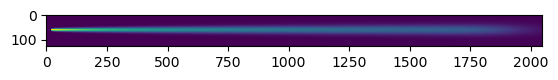

   Delta (log) to:    1 Time  4.00000E+02 y


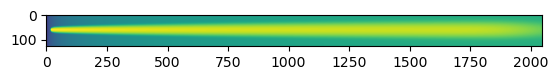

   1 Time  4.00000E+02 y


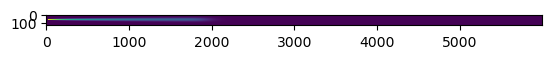

   Delta (abs) to:    2 Time  8.00000E+02 y


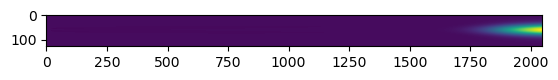

   Delta (log) to:    2 Time  8.00000E+02 y


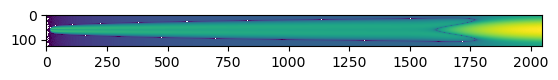

   2 Time  8.00000E+02 y


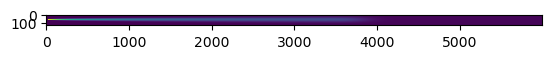

   Delta (abs) to:    3 Time  1.20000E+03 y


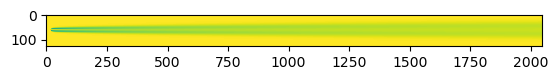

   Delta (log) to:    3 Time  1.20000E+03 y


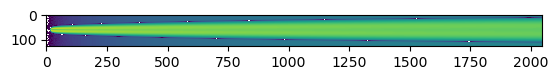

   3 Time  1.20000E+03 y


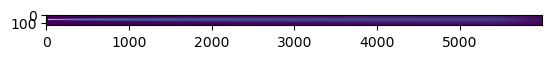

   Delta (abs) to:    4 Time  1.60000E+03 y


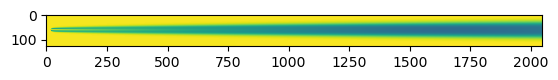

   Delta (log) to:    4 Time  1.60000E+03 y


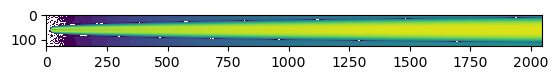

   4 Time  1.60000E+03 y


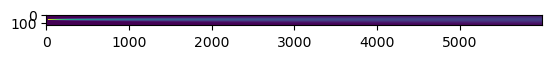

   Delta (abs) to:    5 Time  2.00000E+03 y


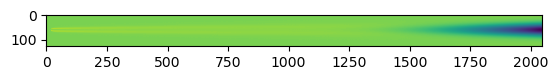

   Delta (log) to:    5 Time  2.00000E+03 y


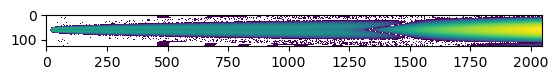

   5 Time  2.00000E+03 y


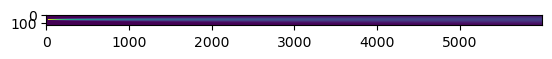

Datapoint: 1
   0 Time  0.00000E+00 y


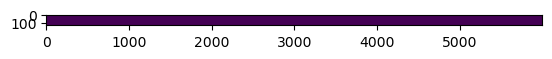

   Delta (abs) to:    1 Time  4.00000E+02 y


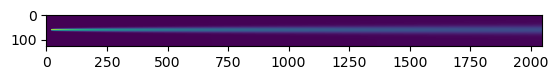

   Delta (log) to:    1 Time  4.00000E+02 y


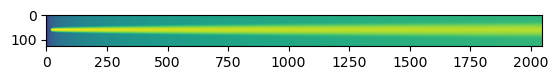

   1 Time  4.00000E+02 y


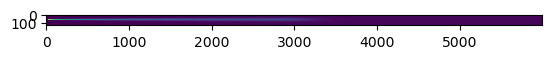

   Delta (abs) to:    2 Time  8.00000E+02 y


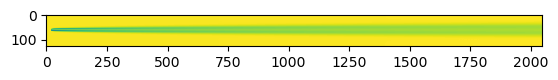

   Delta (log) to:    2 Time  8.00000E+02 y


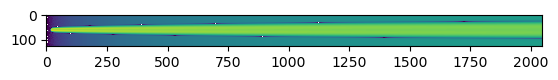

   2 Time  8.00000E+02 y


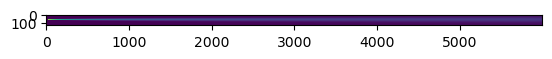

   Delta (abs) to:    3 Time  1.20000E+03 y


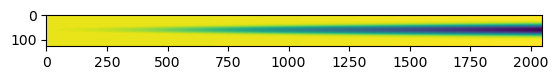

   Delta (log) to:    3 Time  1.20000E+03 y


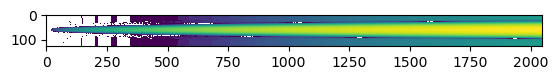

   3 Time  1.20000E+03 y


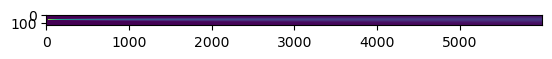

   Delta (abs) to:    4 Time  1.60000E+03 y


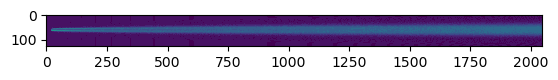

   Delta (log) to:    4 Time  1.60000E+03 y


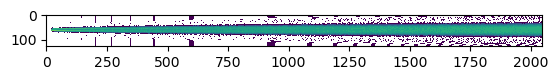

   4 Time  1.60000E+03 y


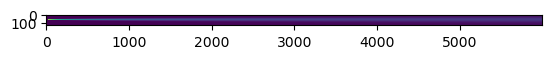

   Delta (abs) to:    5 Time  2.00000E+03 y


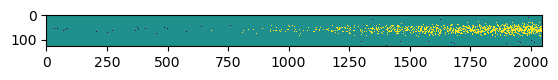

   Delta (log) to:    5 Time  2.00000E+03 y


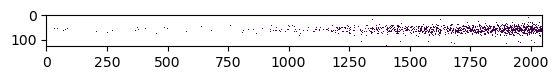

   5 Time  2.00000E+03 y


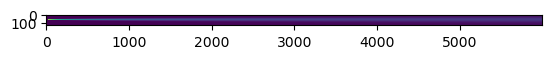

Datapoint: 2
   0 Time  0.00000E+00 y


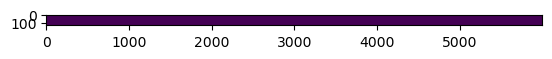

KeyboardInterrupt: 

In [5]:
for i in points:
    temp = None
    last_temp = None
    print("Datapoint: " + str(i))
    file = h5py.File(path + "RUN_" + str(i) + "/pflotran.h5", 'r')
    for time in list(file.keys()):
        dp = file[time]
        last_temp = temp
        temp = torch.tensor(dp['Temperature [C]']).float().reshape(shape).unsqueeze(0)
        if not (last_temp == None):
            delta = temp.squeeze()[0:upper_end] - last_temp.squeeze()[0:upper_end]
            print("   Delta (abs) to: " + time)
            plt.imshow(delta.T)
            plt.show()
            print("   Delta (log) to: " + time)
            plt.imshow(torch.log(torch.abs(delta.T)))
            plt.show()
        print(time)
        plt.imshow(temp.squeeze().T[0:upper_end])
        plt.show()

Datapoint: 3
   Pressure gradient: 0.0
   Permeability: 3e-10


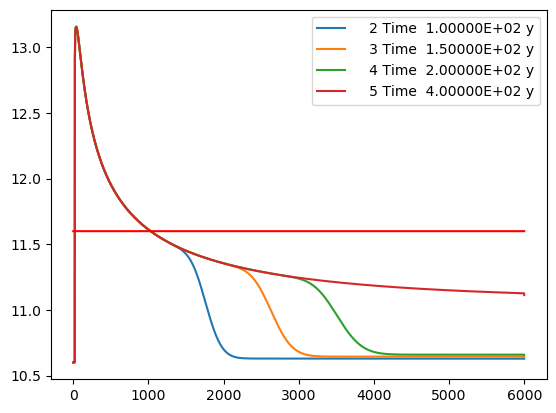

In [13]:
for i in points:
    print("Datapoint: " + str(i))
    file = h5py.File(path + "RUN_" + str(i) + "/pflotran.h5", 'r')
    dp = file["   0 Time  0.00000E+00 y"]
    pressure_gradient = (dp["Liquid Pressure [Pa]"][64] - dp["Liquid Pressure [Pa]"][0])/5.0
    print("   Pressure gradient: " + str(pressure_gradient))
    print("   Permeability: " + str(dp["Permeability X [m^2]"][0]))
    for time in list(file.keys())[2:]:
        dp = file[time]
        temp = torch.tensor(dp['Temperature [C]']).float().reshape(shape)
        plt.plot(temp[:, shape[1]//2], label=time)
        plt.legend()
    plt.plot([11.6 for i in range(shape[0])], 'r')
    plt.show()
    # temp_line = torch.tensor(file[list(file.keys())[-1]]['Temperature [C]']).float().reshape(shape)[...,9]
    # A = torch.ones((200, 2))
    # A[:, 0] = torch.arange(400, 600)
    # X = torch.linalg.lstsq(A, temp_line[400:600]).solution
    # A = torch.ones((2000, 2))
    # A[:, 0] = torch.arange(0, 2000)
    # prediction = A @ X
    # plt.plot(prediction)
    # plt.plot(temp_line)
    # plt.show()

Datapoint: 3
   Pressure gradient: 0.0
   Permeability: 3e-10


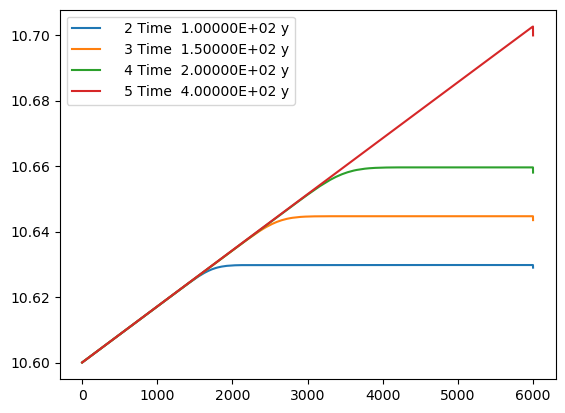

In [16]:
for i in points:
    print("Datapoint: " + str(i))
    file = h5py.File(path + "RUN_" + str(i) + "/pflotran.h5", 'r')
    dp = file["   0 Time  0.00000E+00 y"]
    pressure_gradient = (dp["Liquid Pressure [Pa]"][64] - dp["Liquid Pressure [Pa]"][0])/5.0
    print("   Pressure gradient: " + str(pressure_gradient))
    print("   Permeability: " + str(dp["Permeability X [m^2]"][0]))
    for time in list(file.keys())[2:]:
        dp = file[time]
        temp = torch.tensor(dp['Temperature [C]']).float().reshape(shape)
        plt.plot(temp[..., 0], label=time)
        plt.legend()
    plt.show()

Datapoint: 3
   Pressure gradient: 0.0
   Permeability: 3e-10


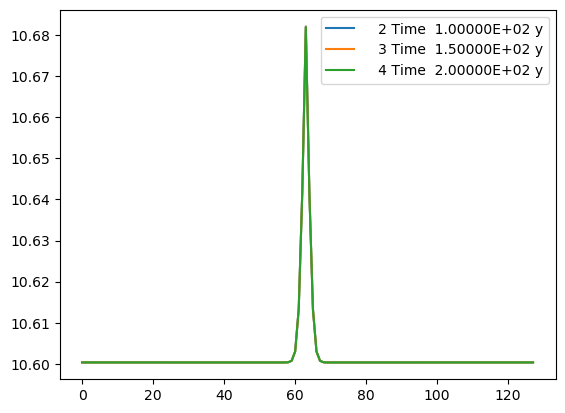

In [17]:
for i in points:
    print("Datapoint: " + str(i))
    file = h5py.File(path + "RUN_" + str(i) + "/pflotran.h5", 'r')
    dp = file["   0 Time  0.00000E+00 y"]
    pressure_gradient = (dp["Liquid Pressure [Pa]"][64] - dp["Liquid Pressure [Pa]"][0])/5.0
    print("   Pressure gradient: " + str(pressure_gradient))
    print("   Permeability: " + str(dp["Permeability X [m^2]"][0]))
    for time in list(file.keys())[2:-1]:
        dp = file[time]
        temp = torch.tensor(dp['Temperature [C]']).float().reshape(shape)
        plt.plot(temp[..., 20, :], label=time)
        plt.legend()
    plt.show()

Datapoint: 0
   Pressure gradient: -14.706409657280892
   Permeability: 2e-09


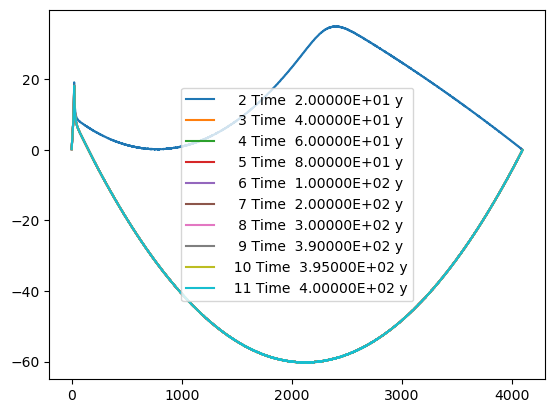

Datapoint: 1
   Pressure gradient: -24.51068276213482
   Permeability: 2e-09


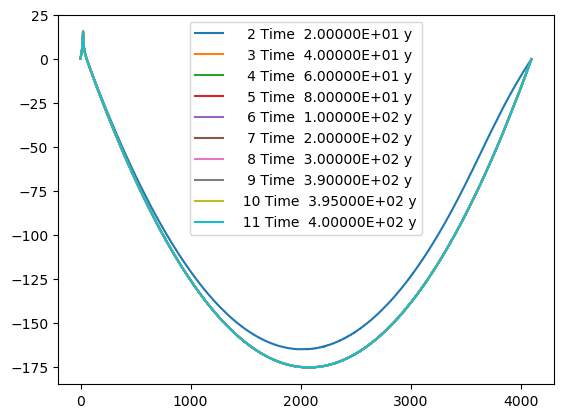

Datapoint: 2
   Pressure gradient: -34.31495586696546
   Permeability: 2e-09


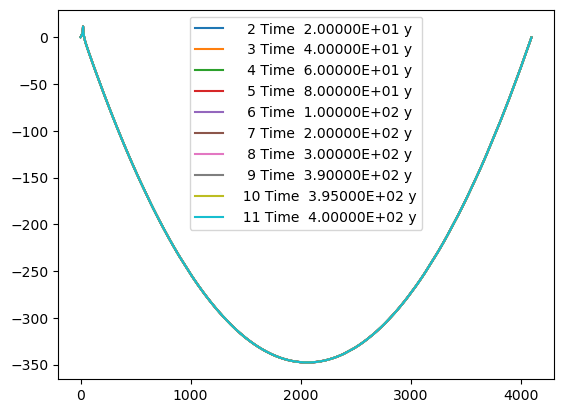

Datapoint: 3
   Pressure gradient: -14.706409657280892
   Permeability: 2e-10


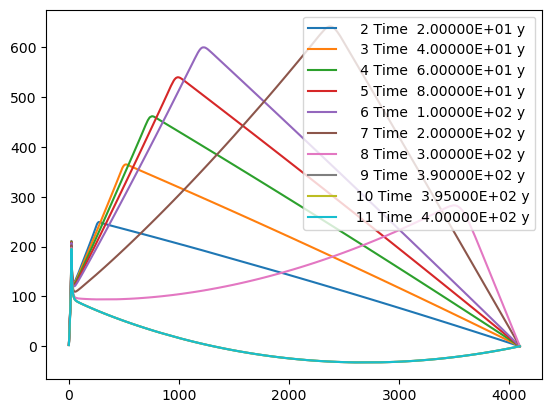

Datapoint: 4
   Pressure gradient: -24.51068276213482
   Permeability: 2e-10


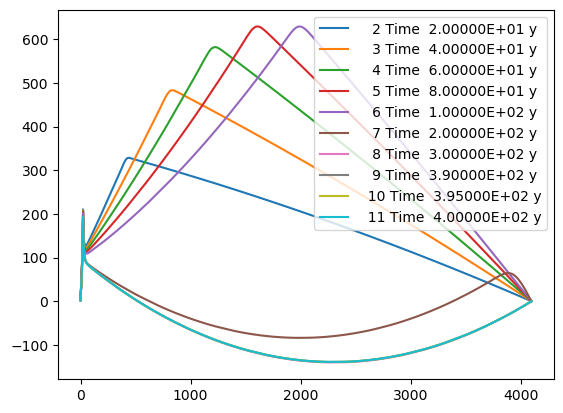

Datapoint: 5
   Pressure gradient: -34.31495586696546
   Permeability: 2e-10


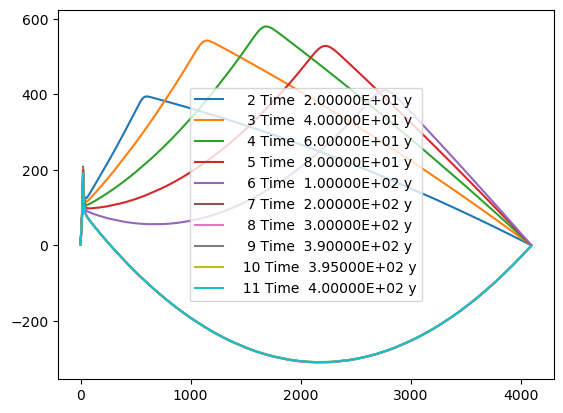

Datapoint: 6
   Pressure gradient: -14.706409657280892
   Permeability: 2e-11


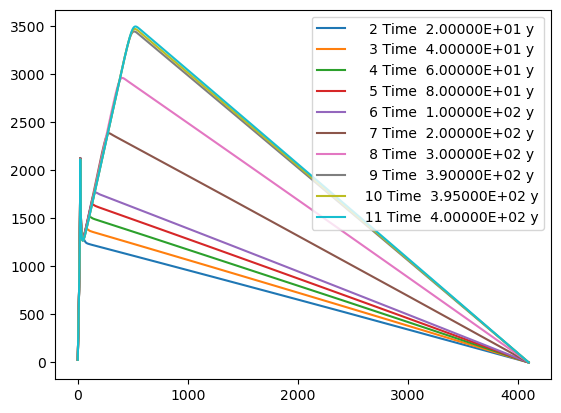

Datapoint: 7
   Pressure gradient: -24.51068276213482
   Permeability: 2e-11


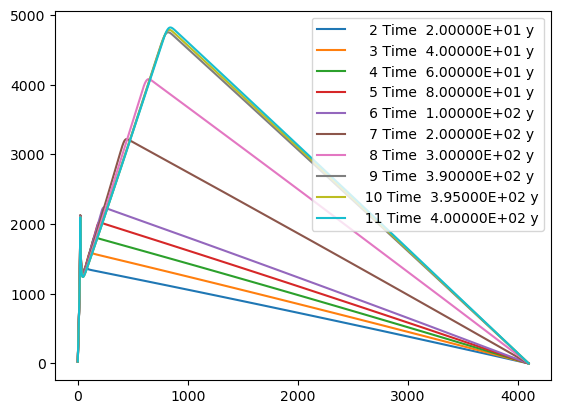

Datapoint: 8
   Pressure gradient: -34.31495586696546
   Permeability: 2e-11


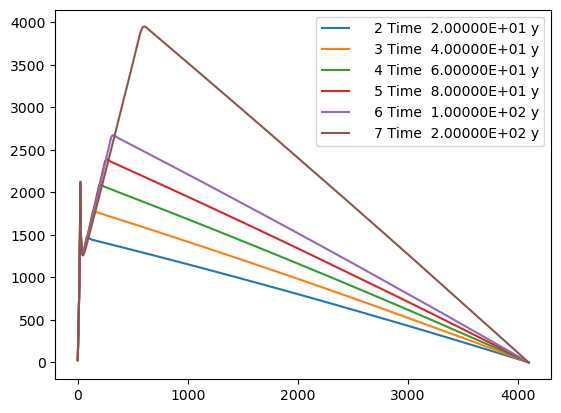

In [23]:
for i in points:
    print("Datapoint: " + str(i))
    file = h5py.File(path + "RUN_" + str(i) + "/pflotran.h5", 'r')
    dp = file["   0 Time  0.00000E+00 y"]
    pressure_gradient = (dp["Liquid Pressure [Pa]"][64] - dp["Liquid Pressure [Pa]"][0])/5.0
    orig_press = torch.tensor(dp["Liquid Pressure [Pa]"]).float().reshape(shape)
    print("   Pressure gradient: " + str(pressure_gradient))
    print("   Permeability: " + str(dp["Permeability X [m^2]"][0]))
    for time in list(file.keys())[2:]:
        dp = file[time]
        press = torch.tensor(dp['Liquid Pressure [Pa]']).float().reshape(shape)
        plt.plot((press - orig_press)[..., shape[1]//2], label=time)
        plt.legend()
    plt.show()

Datapoint: 0
   Pressure gradient: -14.706409657280892
   Permeability: 2e-09


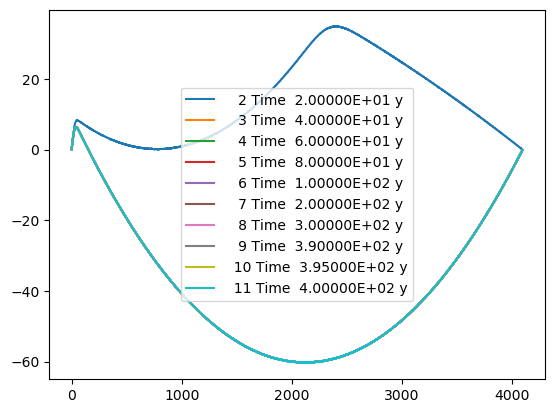

Datapoint: 1
   Pressure gradient: -24.51068276213482
   Permeability: 2e-09


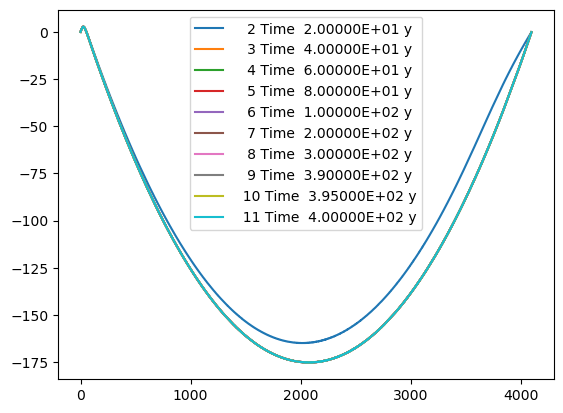

Datapoint: 2
   Pressure gradient: -34.31495586696546
   Permeability: 2e-09


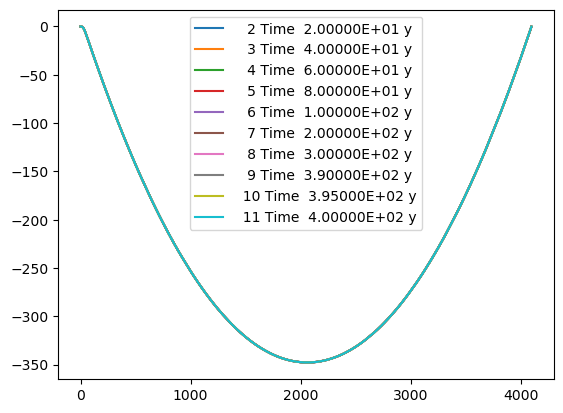

Datapoint: 3
   Pressure gradient: -14.706409657280892
   Permeability: 2e-10


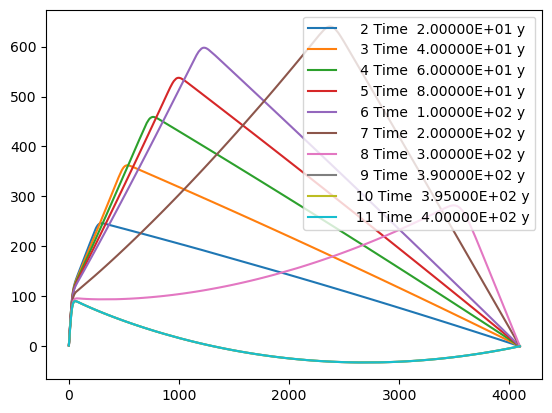

Datapoint: 4
   Pressure gradient: -24.51068276213482
   Permeability: 2e-10


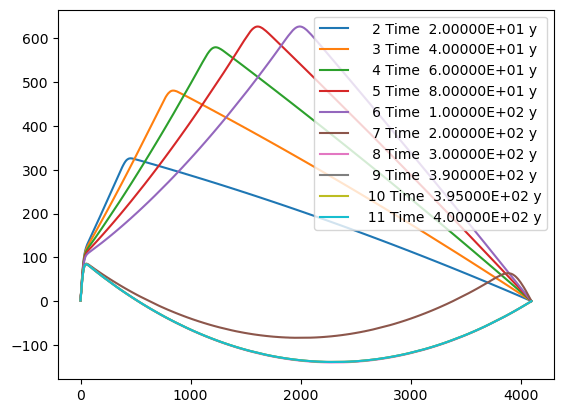

Datapoint: 5
   Pressure gradient: -34.31495586696546
   Permeability: 2e-10


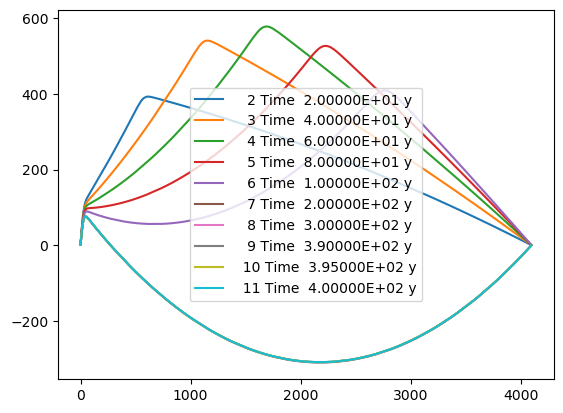

Datapoint: 6
   Pressure gradient: -14.706409657280892
   Permeability: 2e-11


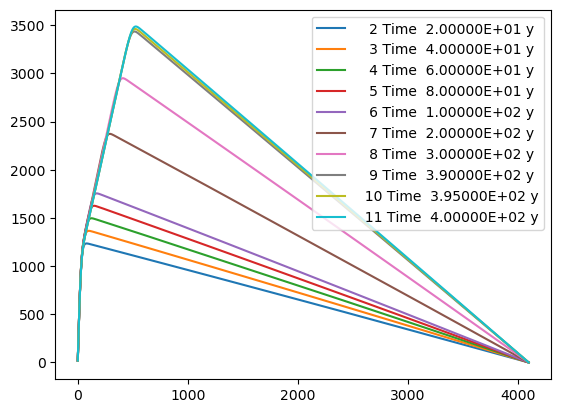

Datapoint: 7
   Pressure gradient: -24.51068276213482
   Permeability: 2e-11


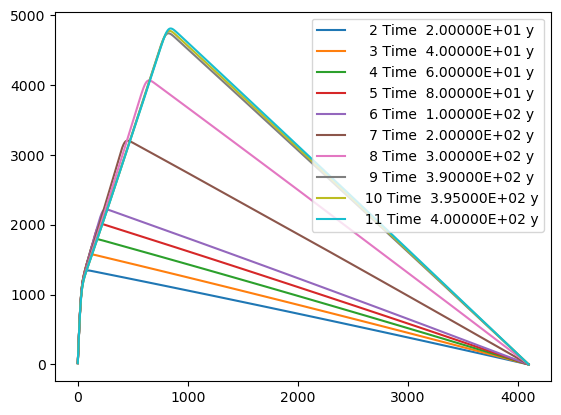

Datapoint: 8
   Pressure gradient: -34.31495586696546
   Permeability: 2e-11


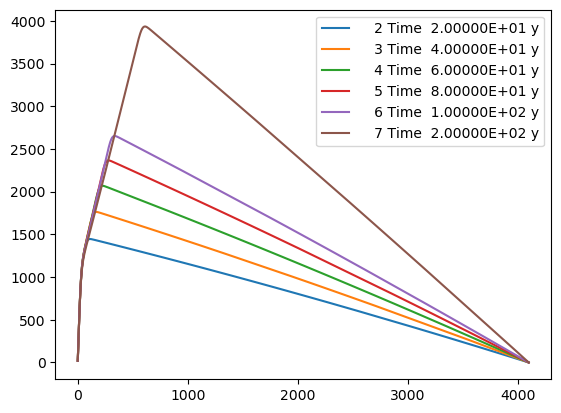

In [24]:
for i in points:
    print("Datapoint: " + str(i))
    file = h5py.File(path + "RUN_" + str(i) + "/pflotran.h5", 'r')
    dp = file["   0 Time  0.00000E+00 y"]
    pressure_gradient = (dp["Liquid Pressure [Pa]"][64] - dp["Liquid Pressure [Pa]"][0])/5.0
    orig_press = torch.tensor(dp["Liquid Pressure [Pa]"]).float().reshape(shape)
    print("   Pressure gradient: " + str(pressure_gradient))
    print("   Permeability: " + str(dp["Permeability X [m^2]"][0]))
    for time in list(file.keys())[2:]:
        dp = file[time]
        press = torch.tensor(dp['Liquid Pressure [Pa]']).float().reshape(shape)
        plt.plot((press - orig_press)[..., 0], label=time)
        plt.legend()
    plt.show()

Datapoint: 0
   Pressure gradient: -14.706409657280892
   Permeability: 2e-09


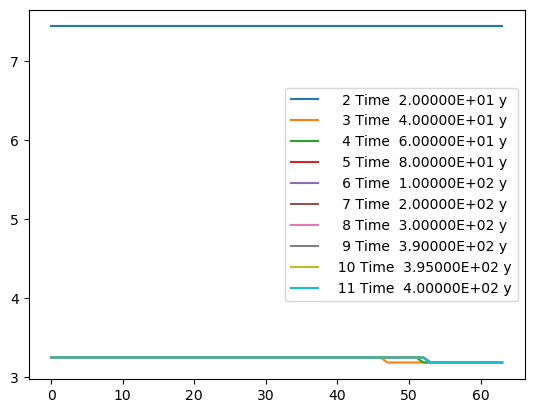

Datapoint: 1
   Pressure gradient: -24.51068276213482
   Permeability: 2e-09


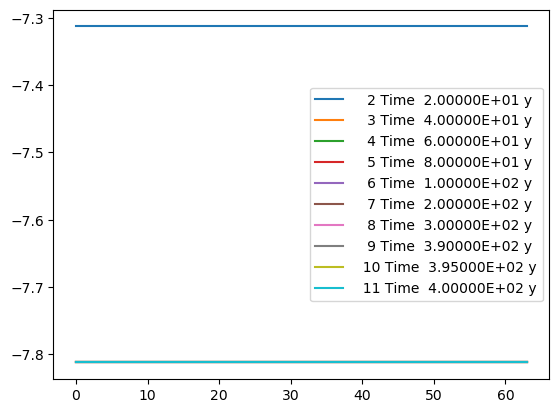

Datapoint: 2
   Pressure gradient: -34.31495586696546
   Permeability: 2e-09


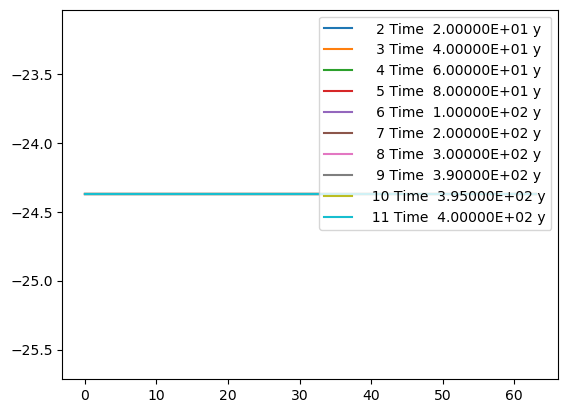

Datapoint: 3
   Pressure gradient: -14.706409657280892
   Permeability: 2e-10


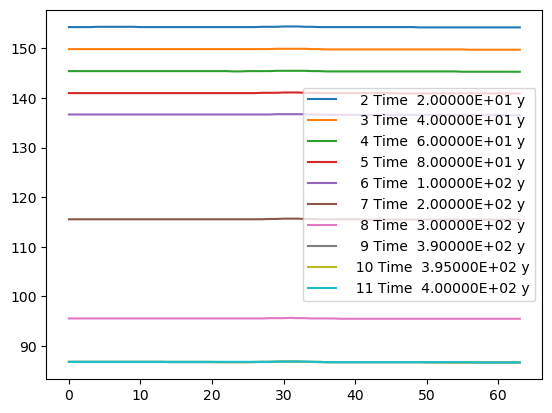

Datapoint: 4
   Pressure gradient: -24.51068276213482
   Permeability: 2e-10


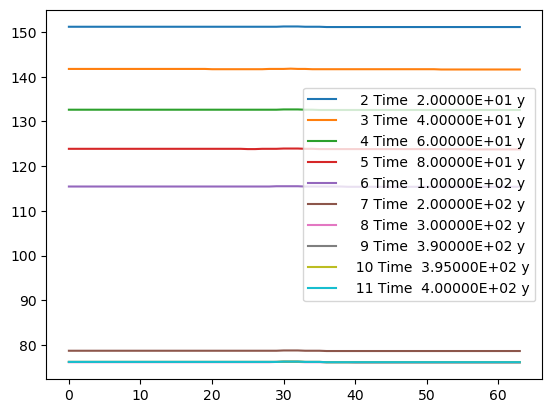

Datapoint: 5
   Pressure gradient: -34.31495586696546
   Permeability: 2e-10


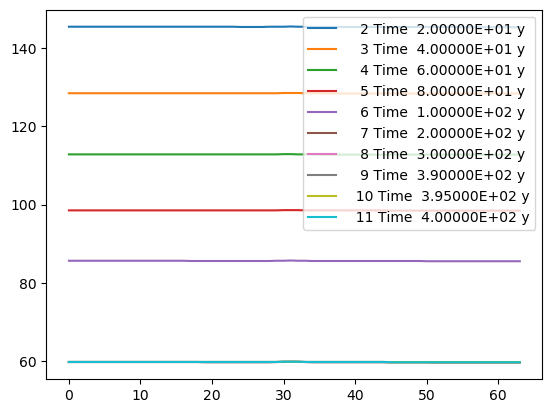

Datapoint: 6
   Pressure gradient: -14.706409657280892
   Permeability: 2e-11


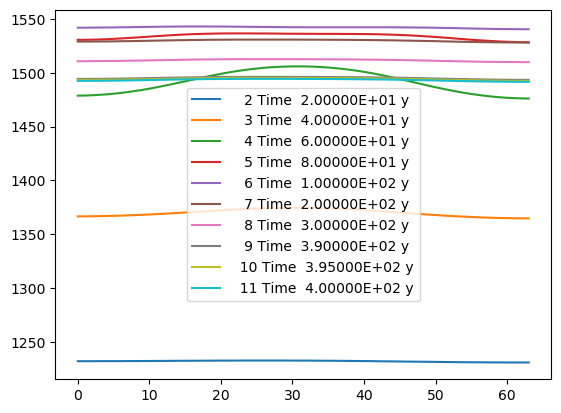

Datapoint: 7
   Pressure gradient: -24.51068276213482
   Permeability: 2e-11


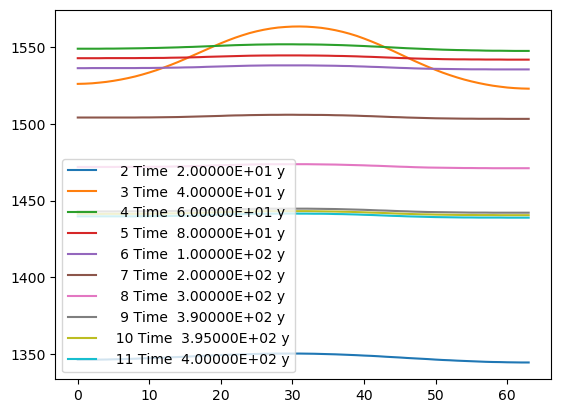

Datapoint: 8
   Pressure gradient: -34.31495586696546
   Permeability: 2e-11


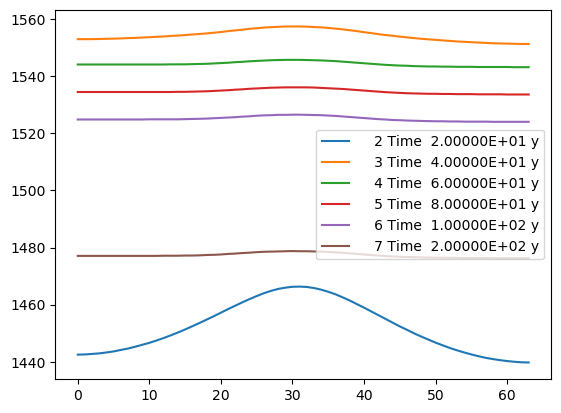

In [25]:
for i in points:
    print("Datapoint: " + str(i))
    file = h5py.File(path + "RUN_" + str(i) + "/pflotran.h5", 'r')
    dp = file["   0 Time  0.00000E+00 y"]
    pressure_gradient = (dp["Liquid Pressure [Pa]"][64] - dp["Liquid Pressure [Pa]"][0])/5.0
    orig_press = torch.tensor(dp["Liquid Pressure [Pa]"]).float().reshape(shape)
    print("   Pressure gradient: " + str(pressure_gradient))
    print("   Permeability: " + str(dp["Permeability X [m^2]"][0]))
    for time in list(file.keys())[2:]:
        dp = file[time]
        press = torch.tensor(dp['Liquid Pressure [Pa]']).float().reshape(shape)
        plt.plot((press - orig_press)[..., 100, :], label=time)
        plt.legend()
    plt.show()

# Other stuff

In [46]:
from torch import nn

# prepare 2nd level
prepared_dir_2ndlevel = Path(paths["datasets_prepared_dir"]) / f"{dataset_name} cut_8pieces separate_boxes 2nd level gkt"

info = yaml.safe_load(open(prepared_dir_2ndlevel / "info.yaml", "r"))


file_inputs = prepared_dir_2ndlevel / "Inputs" / "RUN_4001.pt"
inputs = torch.load(file_inputs)
plt.imshow(inputs[1])
plt.show()
plt.imshow(inputs[2])
plt.show()
plt.imshow(inputs[0])
plt.colorbar()
plt.show()


file_labels = prepared_dir_2ndlevel / "Labels" / "RUN_4001.pt"
labels_orig = torch.load(file_labels)
labels = torch.cat([inputs[0:1, -1:, :], labels_orig], dim=1)
labels = nn.functional.pad(labels, (1, 1, 0, 1), "replicate")
plt.imshow(labels[0])
plt.colorbar()
plt.show()
mask = torch.tensor([[(i == 0) or (j == 0 or j == 15) for j in range(16)] for i in range(32)])
labels_orig[0][mask] = torch.zeros_like(labels_orig)[0][mask]
plt.imshow(labels_orig[0])
plt.colorbar()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/sc/pillerls/datasets_prepared/dataset_long_sim_100y cut_8pieces separate_boxes 2nd level gkt/info.yaml'